In [1]:
# import libraries

import warnings
from math import sqrt, log
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer, MinMaxScaler, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.impute import SimpleImputer


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectFromModel, SelectPercentile

from mlxtend.feature_selection import SequentialFeatureSelector

import feature_engine.encoding as fe_encoding
import category_encoders as ce
from feature_engine.encoding import DecisionTreeEncoder, RareLabelEncoder, OrdinalEncoder as FeatureEngineOrdinalEncoding
from feature_engine.imputation import CategoricalImputer, AddMissingIndicator

from sklearn.model_selection import GridSearchCV


pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings(action='once')

In [2]:
# Load dataset

train_data = pd.read_csv('../datasets/home-data-for-ml-course/train.csv', index_col='Id')

train_data.shape

(1460, 80)

In [3]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# split train data to training set & validation set.
train_x, val_x, train_y, val_y = train_test_split(train_data.drop('SalePrice', axis=1), 
                                                  train_data['SalePrice'],
                                                  test_size=0.2, random_state=0, shuffle=True)

In [7]:
# Build a baseline model with OHE & most frequent missing value imputer

pipeline = Pipeline([    
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=True)),
#     ('regressor', RandomForestRegressor(n_estimators=50, max_depth=3, random_state=0)),
    ('regressor', Lasso(random_state=0))
])

pipeline.fit(train_x, train_y)
y_pred = pipeline.predict(val_x)
mse = mean_squared_error(val_y, y_pred)
print(mse, sqrt(mse))

1510932307.6486251 38870.71272370273


/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:607: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9882280283.855686, tolerance: 719132949.9230078
  model = cd_fast.sparse_enet_coordinate_descent(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:170: UserWarning: Found unknown categories in columns [2, 3, 13, 18, 21, 25, 33, 35, 36, 37, 42, 43, 44, 45, 54, 61, 65, 66, 67, 68, 69, 70, 73] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# EDA

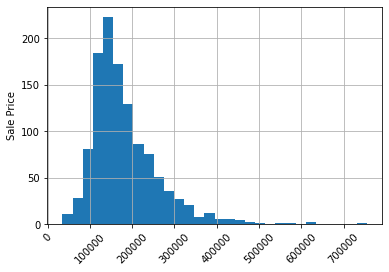

In [8]:
# inspect distribution of target variable

train_y.hist(bins=30)
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Find numerical, categorical & continuous variables.

categorical_feat = [col for col in train_x.columns if train_x[col].dtype == 'O']

print(f'There are {len(categorical_feat)} categorical variables.')
print()
numeric_feat = [col for col in train_x.columns if train_x[col].dtype != 'O']
print(f'There are {len(numeric_feat)} numerical variables: ')
print()
# find continuous features
continuous_feat = [feat for feat in numeric_feat if train_x[feat].nunique() > 15]
print(f'There are {len(continuous_feat)} continuous variables : ')

There are 43 categorical variables.

There are 36 numerical variables: 

There are 21 continuous variables : 


In [11]:
# explore missing data

missing_data_cols = train_data.columns[train_data.isnull().any()]
missing_data_sums = train_data[missing_data_cols].isnull().sum()
(missing_data_sums / len(train_data)).sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

It's clear that `['PoolQC', 'MiscFeature', 'Alley']` has more than 90% of missing data so it doesn't provide any pattern to predict the SalePrice so, we'll remove them too. Let's inspect other variables more deeply.

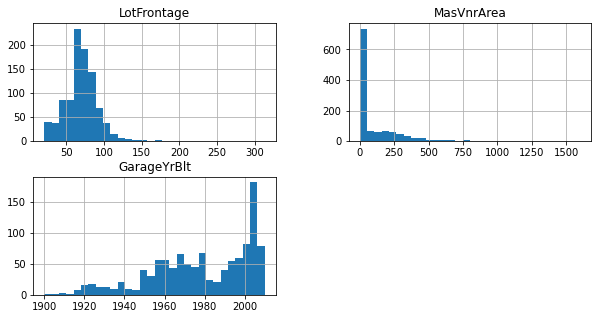

In [12]:
# lets visualize distribution of numeric missing features.

numeric_missing_cols = [feat for feat in numeric_feat if feat in missing_data_cols]
categorical_missing_cols = [feat for feat in categorical_feat if feat in missing_data_cols]
train_x[numeric_missing_cols].hist(bins=30, figsize=(10, 5))
plt.show()

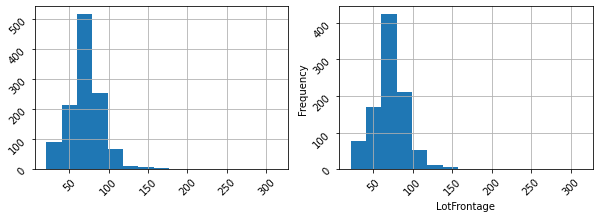

In [13]:
# using ffill to impute missing data for `LotFrontage` feature

tmp_series = train_x['LotFrontage'].fillna(method='ffill')

fig, axes = plt.subplots(1, 2)
axes[0].tick_params(labelrotation=45)
axes[1].tick_params(labelrotation=45)

tmp_series.hist(bins=15, figsize=(5, 5), ax=axes[0])
plt.ylabel('Frequency')
plt.xlabel('LotFrontage')

train_x['LotFrontage'].hist(bins=15, figsize=(10, 3), ax=axes[1])
plt.ylabel('Frequency')
plt.xlabel('LotFrontage')
plt.show()


The distributions for 'LotFrontage' before & after `forward fill` data imputation method are same so we'll use this method.

In [14]:
train_x[['GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']].isnull().sum()

train_x[['GarageCars', 'GarageArea']].isnull().sum()

GarageCars    0
GarageArea    0
dtype: int64

Missing values in feature `GarageYrBlt` is due to the absence of a Garage in that property. In that case we'll impute constant value zero to that field and add a missing category to missing values in other garage related categorical variables & those are `'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond'`

In [15]:
train_x[['BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']].isnull().sum()

BsmtExposure    28
BsmtFinType2    29
BsmtFinType1    28
BsmtCond        28
BsmtQual        28
dtype: int64

Same thing applicable to Basement related features also, `'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'`. The properties that doesnt hv a basement has missing values. We'll use a `missing` label for data imputation.

In [16]:
train_x[['MasVnrType', 'MasVnrArea']].isnull().sum()

MasVnrType    6
MasVnrArea    6
dtype: int64

We'll also use the same approach for `MasVnr*` features, both `'MasVnrType', 'MasVnrArea'` are missing at the same time so we'll impute `0` for `'MasVnrArea'` & add a `missing` label to `MasVnrType` categorical feature.

In [17]:
# Inspect missing values for 'FireplaceQu' feature
# train_x[train_x['FireplaceQu'].isnull()]['Fireplaces'].count(), train_x['FireplaceQu'].isnull().sum()

print('Missing data count: ' + str(train_x['FireplaceQu'].isnull().sum()))

fireplace_count = train_x[train_x['FireplaceQu'].isnull()]['Fireplaces'].count()

print('No of properties with zero fireplaces: ' + str(fireplace_count))

train_x[train_x['FireplaceQu'].isnull()][['Fireplaces', 'FireplaceQu']].head()

Missing data count: 551
No of properties with zero fireplaces: 551


,Fireplaces,FireplaceQu
Id,,
871,0,NaN
93,0,NaN
1455,0,NaN
960,0,NaN
76,0,NaN


551 of `'FireplaceQu'` feature values are missing, this is due to absence of `Fireplace` in such properties. So we'll recognize such values of `'FireplaceQu'` feature with `'Missing'` labels.

Percentage of property with no fence: 0.8167808219178082


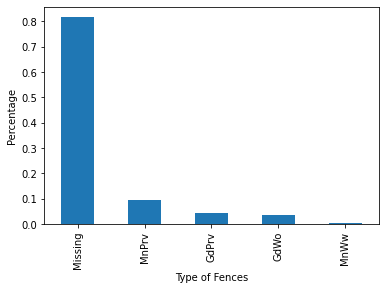

<AxesSubplot:xlabel='Fence'>

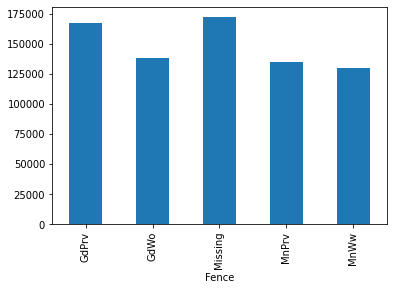

In [18]:
# Inspect 'Fence' feature for missing values.

print('Percentage of property with no fence: ' + str(train_x['Fence'].isnull().sum() / len(train_x)))

tmp_series = train_x['Fence'].fillna('Missing')
(tmp_series.value_counts() / len(train_x)).plot.bar()
plt.ylabel('Percentage')
plt.xlabel('Type of Fences')
plt.show()

pd.concat([tmp_series, train_y.rename('SalePrice')], axis=1).groupby('Fence')['SalePrice'].median().plot.bar()

Missing label will be added to missing values and a missing indicator too.

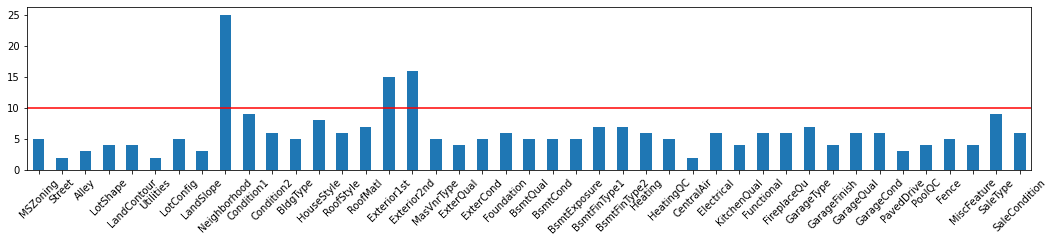

In [19]:
# Inspect cardinality categorical features.

plt.axhline(y=10, color='r', linestyle='-')
train_x[categorical_feat].fillna('NA').nunique().plot(figsize=(18,3), rot=45, kind='bar')
plt.show()
# categorical_feat

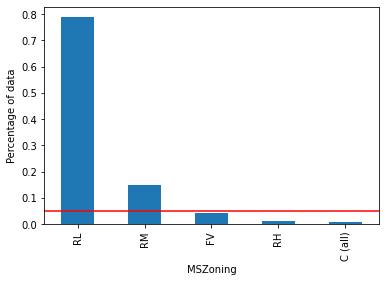

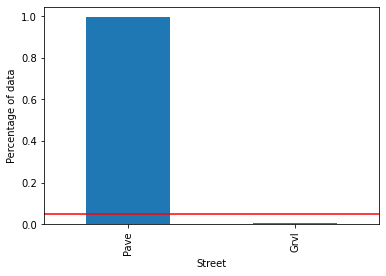

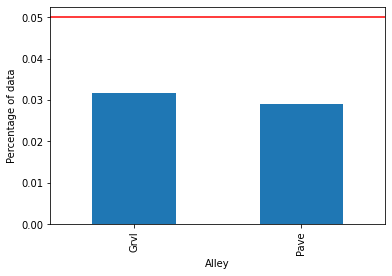

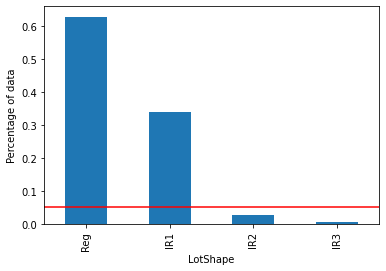

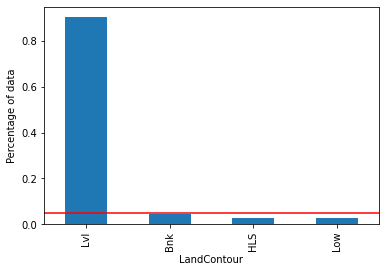

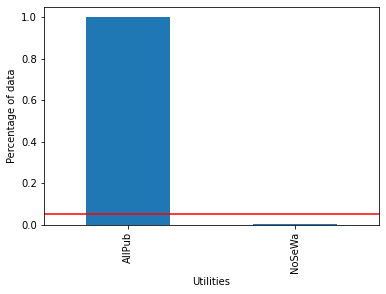

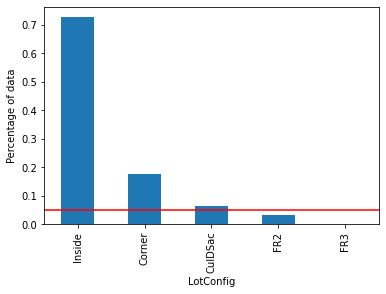

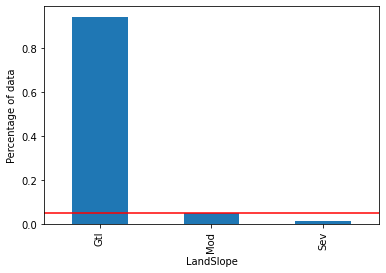

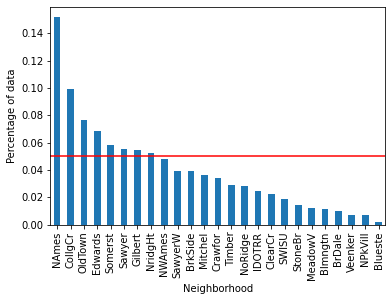

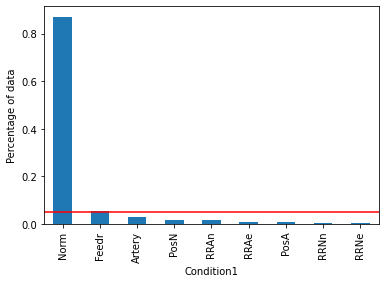

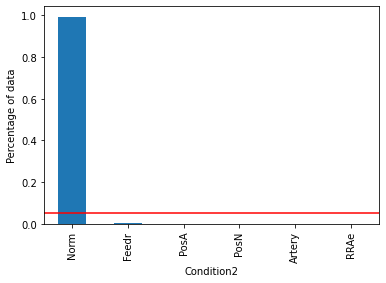

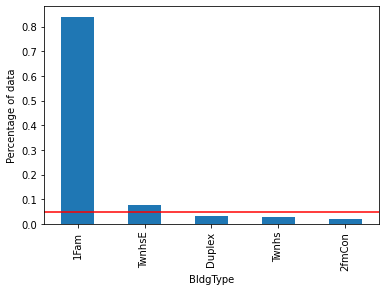

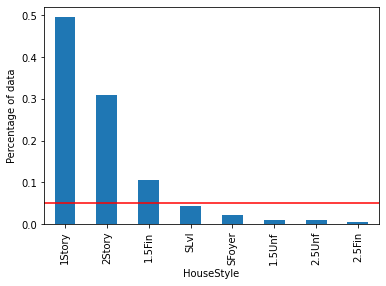

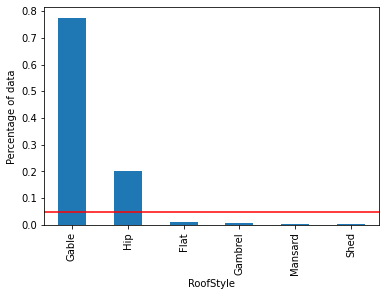

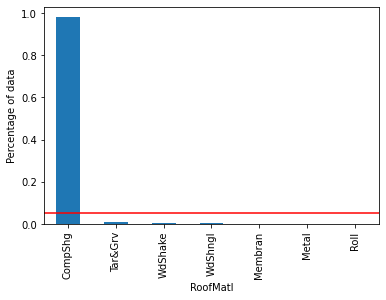

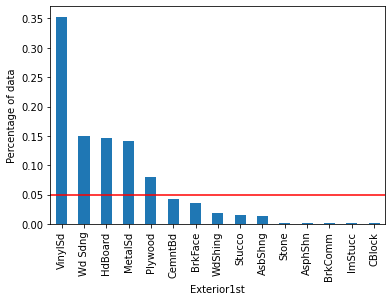

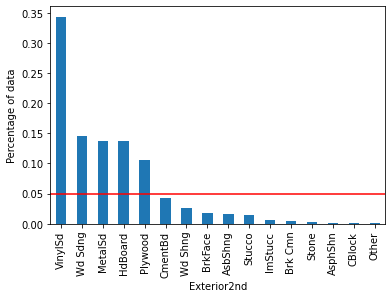

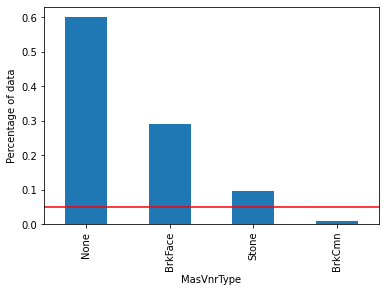

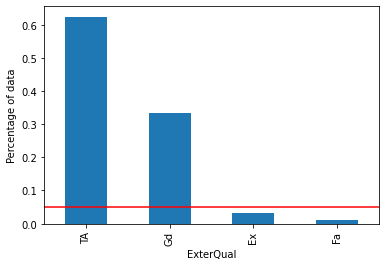

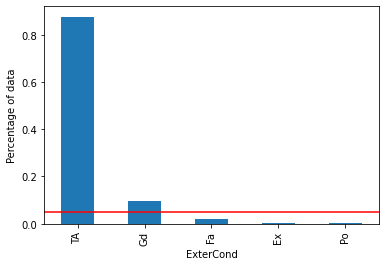

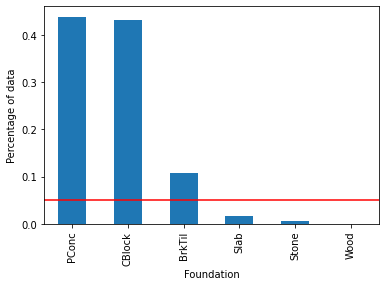

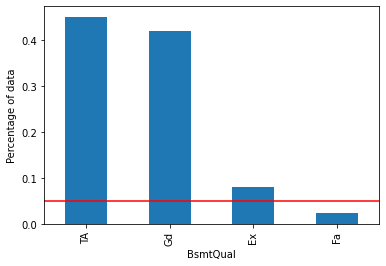

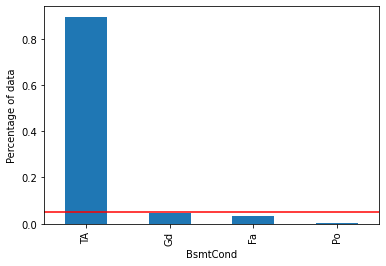

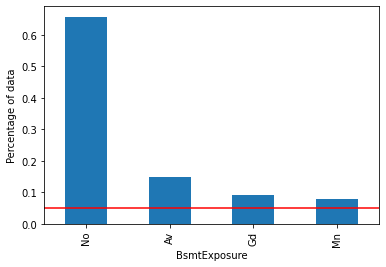

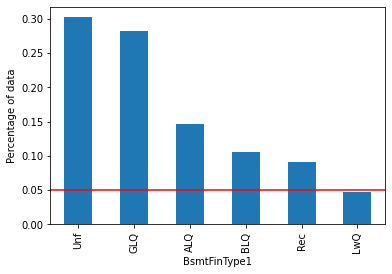

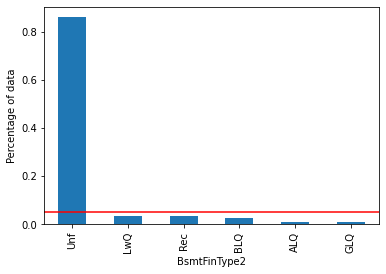

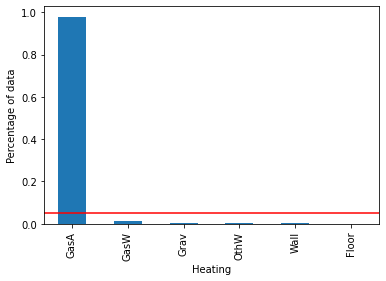

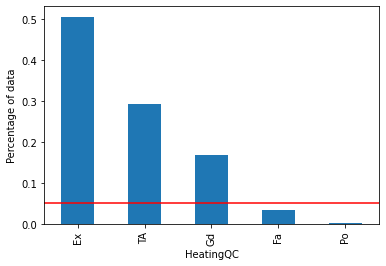

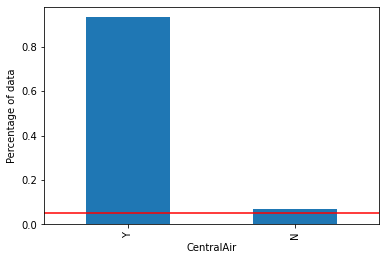

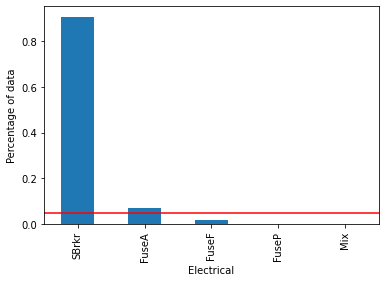

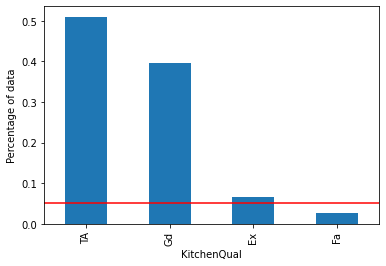

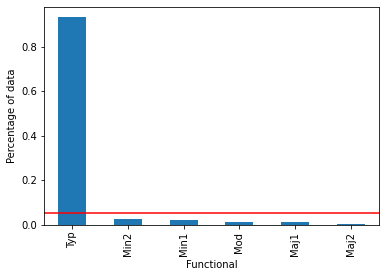

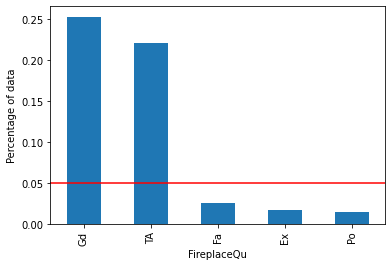

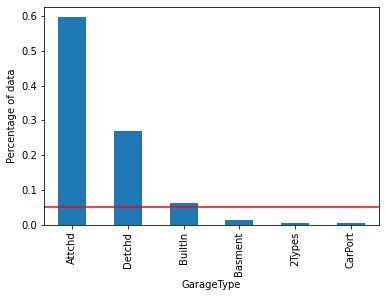

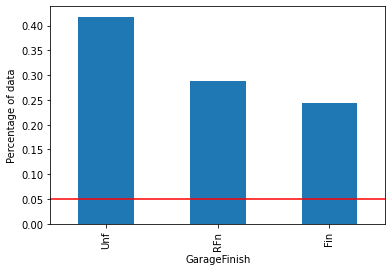

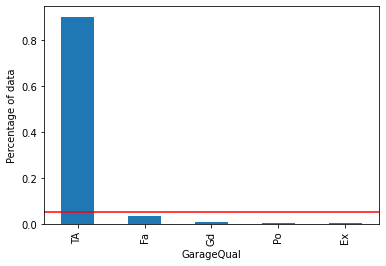

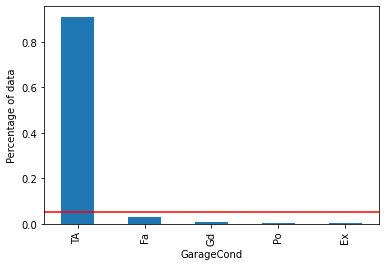

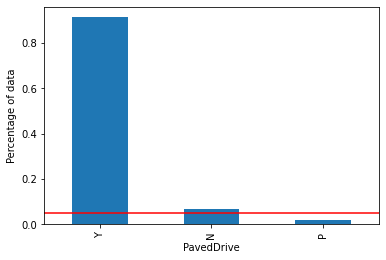

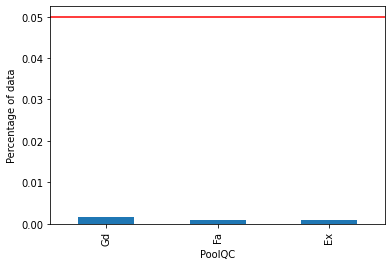

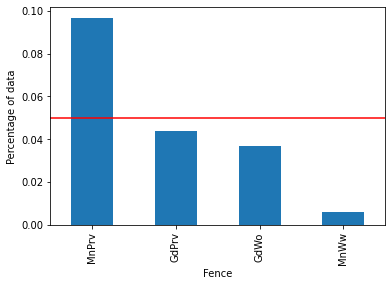

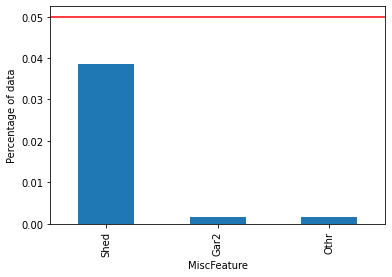

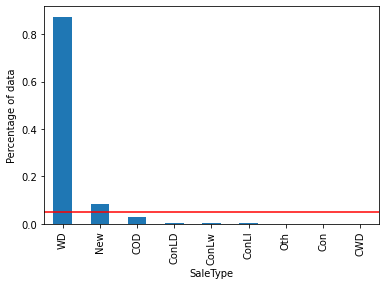

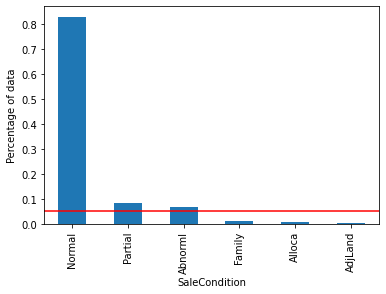

In [20]:
# lets visualize the rare labels.

def visualize_rare_labels(df, feat, threshold=0.05):
    tmp_series = pd.Series(df[feat].value_counts() / len(df))
#     if (len(tmp_series[tmp_series < threshold]) > 1):
    fig = tmp_series.sort_values(ascending=False).plot.bar()
    fig.axhline(y = threshold, color='red')
    fig.set_xlabel(feat)
    fig.set_ylabel('Percentage of data')
    plt.show()
    
for feat in categorical_feat:      
    visualize_rare_labels(train_x, feat, 0.05)

We have to use rare label encoding to deal with high cardinality & rare labels in categorical features.

In [ ]:
class OrderedOrdinalEncoding(BaseEstimator, TransformerMixin):
    
    def fit(self, x, y):

In [85]:
# split train data to training set & validation set.
train_x, val_x, train_y, val_y = train_test_split(train_data.drop('SalePrice', axis=1), 
                                                  train_data['SalePrice'],
                                                  test_size=0.2, random_state=0)

# Preprocess, impute, encode

class PandasSimpleImputer(SimpleImputer):
    """A wrapper around `SimpleImputer` to return data frames with columns.
    """
    def fit(self, X, y=None):
        self.columns = X.columns
        return super().fit(X, y)

    def transform(self, X):
        return pd.DataFrame(super().transform(X), columns=self.columns)


# custom imputer for features 'LotFrontage', 'MasVnrArea' & 'GarageYrBlt'
def custom_data_imputer(x: pd.DataFrame):
    
    # Adding missing indicator
    x['LotFrontage_missing_ind'] = np.where(np.isnan(x['LotFrontage']), 0, 1)
    x['MasVnrArea_missing_ind'] = np.where(np.isnan(x['MasVnrArea']), 0, 1)
    x['GarageYrBlt_missing_ind'] = np.where(np.isnan(x['GarageYrBlt']), 0, 1)
    
    x['LotFrontage'] = x['LotFrontage'].fillna(method='ffill')    
    if x['LotFrontage'].isnull().sum() > 0:
        x['LotFrontage'] = x['LotFrontage'].fillna(method='bfill')    
    
    x['MasVnrArea'] = x['MasVnrArea'].fillna(0)
    x['GarageYrBlt'] = x['GarageYrBlt'].fillna(0)    
    return x


# get data transformer pipeline
numeric_feat = [col for col in train_x.columns if train_x[col].dtype != 'O']
categorical_feat = [col for col in train_x.columns if train_x[col].dtype == 'O']
# continuous_feat = [feat for feat in numeric_feat if x[feat].nunique() > 15]


# for feat in categorical_feat:
#     train_x[feat] = train_x[feat].astype(str)

categorical_data_preprocess = Pipeline(steps=[
    ('categorical_data_imputer', SimpleImputer(strategy='constant', fill_value='Missing', add_indicator=True)),
    ('rare_label_encoding', RareLabelEncoder(tol=0.02, n_categories=3)),
    ('ordinal_encoding', FeatureEngineOrdinalEncoding(handle_unknown='use_encoded_value', unknown_value=-1))
#     ('ohe', OneHotEncoder())
])

numeric_data_preprocess = Pipeline(steps=[

    # adding imputer in case test data contains any missing value
    ('simple_imputer', PandasSimpleImputer(strategy='median')),
    ('discretizer', KBinsDiscretizer(n_bins=75, encode='ordinal', strategy='uniform')),
    ('scaler', StandardScaler()),
#     ('scaler', MinMaxScaler())    
#     ('var_transformer', PowerTransformer(method='yeo-johnson'))
])

transformer = ColumnTransformer(transformers=[
    ('categorical_preprocess', categorical_data_preprocess, categorical_feat),
    ('numeric_data_preprocess', numeric_data_preprocess, numeric_feat)
], remainder='passthrough')

In [86]:
# create pipeline for missing value imputation

warnings.filterwarnings('ignore')

model = Pipeline(steps=[
    ('preprocessor', transformer),
    ('regressor', Lasso(random_state=0))
])

# model = TransformedTargetRegressor(regressor=pipeline, func=np.log, inverse_func=np.exp)
# model = TransformedTargetRegressor(regressor=model)

x = custom_data_imputer(train_x)
x.head()
model.fit(x, train_y)

x = custom_data_imputer(val_x)
y_pred = model.predict(x)

mse = mean_squared_error(val_y, y_pred)
r2 = r2_score(val_y, y_pred)

print('MSE: ' + str(mse), 'RMSE: ' + str(sqrt(mse)), 'R2: ' + str(r2))
# print('Successfully beaten sole\'s model')
# pipeline

MSE: 1686436389.1467612 RMSE: 41066.24391330136 R2: 0.7557959703820333


In [80]:
# param grid search

param_grid = {
    'preprocessor__categorical_preprocess__categorical_data_imputer__strategy': ['constant', 'most_frequent'],
    'preprocessor__categorical_preprocess__categorical_data_imputer__add_indicator': [True, False],
#     'preprocessor__categorical_preprocess__rare_label_encoding__tol': [0.02, 0.025, 0.03, 0.05, 0.07],
#     'preprocessor__numeric_data_preprocess__simple_imputer__strategy': ['mean', 'median', 'most_frequent'],
#     'preprocessor__numeric_data_preprocess__discretizer__n_bins': [10, 15, 20, 30, 35, 40, 50, 55, 65],
#     'preprocessor__numeric_data_preprocess__discretizer__strategy': ['uniform', 'quantile']
}

grid_search = GridSearchCV(n_jobs=4, estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')

grid_search.fit(custom_data_imputer(train_x), train_y)

grid_search.best_params_

/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 2 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/featur

/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 1 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 2 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/featur

/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 7 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 28 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/featu

/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 5 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 7 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 28 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/featu

/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 7 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 28 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feature_engine/encoding/rare_label.py:179: UserWarning: The number of unique categories for variable 34 is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
/home/sid/Development/ds-workspace/feature-engineering/venv/lib/python3.8/site-packages/feat

{'preprocessor__categorical_preprocess__categorical_data_imputer__add_indicator': False,
 'preprocessor__categorical_preprocess__categorical_data_imputer__strategy': 'most_frequent'}

In [62]:
test_data = pd.read_csv('../datasets/home-data-for-ml-course/test.csv', index_col='Id')
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [65]:
# predict

x = custom_data_imputer(test_data)

test_data_predictions = model.predict(x)

test_data_predictions = pd.DataFrame({'SalePrice': test_data_predictions})
test_data_predictions.index = test_data.index
test_data_predictions.to_csv('./submission.csv', index=True)